# Transcript correlation

In [1]:
import pandas as pd

In [2]:
dir_notebook = '/media/volume/volume_spatial/hugo/notebook'

# # ### circa2_
samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21']
samples_ids = ['circa2_ZT01','circa2_ZT05','circa2_ZT09','circa2_ZT13','circa2_ZT17','circa2_ZT21',]
name_dir = 'circa2'

# samples = ["S1_Region1", "S1_Region2", "S2_Region1","S2_Region2"]
# samples_ids = ["S1-Region1", "S1-Region2", "S2-Region1","S2-Region2"]
# name_dir = "last_test"

# dir_ = {'circa2-ZT01' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT05' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT09' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT13' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT17' : "/media/volume/volume_spatial/hugo/data",
#         'circa2-ZT21' : "/media/volume/volume_spatial/hugo/data",
#         "S1_Region1" : '/media/volume/volume_spatial/hugo/data',
#         "S1_Region2" : '/media/volume/volume_spatial/hugo/data',
#         "S2_Region1" : '/media/volume/volume_spatial/hugo/data',
#         "S2_Region2" : '/media/volume/volume_spatial/hugo/data',
#         "3159-1" : '/media/volume/volume_spatial/hugo/data',
#         "3160-1" : '/media/volume/volume_spatial/hugo/data'
#        }

dir_ = "/media/volume/volume_spatial/hugo/data"

In [23]:
import pandas as pd
# samples = ['circa2-ZT01','circa2-ZT05','circa2-ZT09','circa2-ZT13','circa2-ZT17','circa2-ZT21']
# samples_ids = ['circa2_ZT01','circa2_ZT05','circa2_ZT09','circa2_ZT13','circa2_ZT17','circa2_ZT21',]

samples = ['3159-2', "3160-1", "3159-1", "3161-1",]
samples_ids = ['3159-2', "3160-1", "3159-1", "3161-1",]
dir_ = 'D:\\Xenium'

# samples_ids = ['circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#                'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#                'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',]

# samples = ['circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
#                'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
#                'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
#                'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',]

### create a scanpy objects for each sample and create a unique cell name for each cell
def top_genes_():
    list_ = []
    for sample, sample_id in zip(samples, samples_ids):
        transcript_count = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')

        transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20)]
        transcript_count = transcript_count['feature_name'].value_counts()
        transcript_count = transcript_count.sort_index()
        list_.append(transcript_count)

    return list_

def top_genes_assigned():
    list_ = []
    for sample, sample_id in zip(samples, samples_ids):
        transcript_count = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')

        transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20) & (transcript_count[''])]
        transcript_count = transcript_count['feature_name'].value_counts()
        transcript_count = transcript_count.sort_index()
        list_.append(transcript_count)

    return list_
        

In [24]:
test = top_genes_()

In [25]:
from scipy import stats

ref = 0

def spearcor_(test_list):
    nb_sample = len(test_list)
    dict_list = {}
    for n in range(0,nb_sample):
        stat_ = stats.pearsonr(x=test_list[ref].sort_index(), y = test_list[n].sort_index())
        dict_temp = {samples[n]:round(stat_[0],3)}
        dict_list.update(dict_temp)

    return dict_list

In [9]:
dict_list = spearcor_(test)

In [10]:
dict_list

{'circa4-Salk-ZT01': 1.0, 'circa4-Salk-ZT05': 0.993}

In [13]:
import matplotlib.pyplot as plt
def plot_coor(dict_list, save_fig = False):
    x = list(dict_list.keys())
    y = list(dict_list.values())
    low = min(y) - 0.05
    high = max(y) + 0.05
    plt.bar(x,y, color = "lightblue", edgecolor = 'black')
    plt.ylim(low,high)
    plt.hlines(y=1, xmin=-0.5,xmax=12.5, linestyles='dashed', colors = 'black')
    plt.title(f'Spearman correlation of genes order compared to {samples_ids[ref]}')
    plt.tick_params(axis = "x", rotation=90, pad = -90, direction = "in")
    if fig_save:
        plt.savefig(f'plot/spearman_correlation_ref_{samples_ids[ref]}.svg')

NameError: name 'fig_save' is not defined

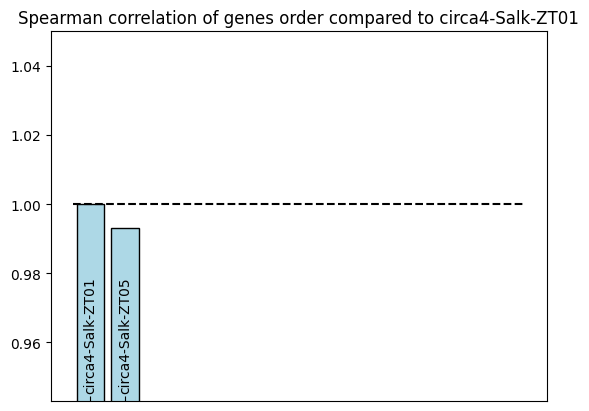

In [14]:
plot_coor(dict_list)

In [ ]:
transcript_count.shape

In [ ]:
transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20)]

In [ ]:
transcript_count.shape

In [ ]:
transcript_count_values = transcript_count['feature_name'].value_counts()

In [ ]:
transcript_count_values_top300 = transcript_count_values[0:300].index

In [ ]:
globals()["transcript_"+str(sample_ids)] = transcript_count_values_top300

In [ ]:
transcript_circa2_ZT01

### Matrix

In [1]:
samples = samples_ids = ['circa2-ZT01','circa2-ZT05','circa2-ZT09',
                         'circa2-ZT13','circa2-ZT17','circa2-ZT21',
                         'circa4-Salk-ZT01','circa4-Salk-ZT05','circa4-Salk-ZT09',
                         'circa4-Salk-ZT13','circa4-Salk-ZT17','circa4-Salk-ZT21',
                         'circa4-IGM-ZT01','circa4-IGM-ZT05','circa4-IGM-ZT09',
                         'circa4-IGM-ZT13','circa4-IGM-ZT17','circa4-IGM-ZT21',]


name_dir = 'circa2'
dir_ = "/media/volume/volume_spatial/hugo/data"

In [26]:
import numpy as np
import pandas as pd
from scipy import stats

d = {}

for sample in samples:
    d_temp = {sample : np.zeros(len(samples))}
    d.update(d_temp)

df = pd.DataFrame(d, index = samples)

In [27]:
def top_genes_():
    list_ = []
    for sample, sample_id in zip(samples, samples_ids):
        transcript_count = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')

        transcript_count = transcript_count[(~transcript_count['feature_name'].str.contains('_')) & (transcript_count['qv']>=20)]
        transcript_count = transcript_count['feature_name'].value_counts()
        transcript_count = transcript_count.sort_index()
        list_.append(transcript_count)

    return list_


def spearcor_(test_list):
    nb_sample = len(test_list)
    dict_list = {}
    for n in range(0,nb_sample):
        stat_ = stats.pearsonr(x=test_list[ref].sort_index(), y = test_list[n].sort_index())
        dict_temp = {samples[n]:round(stat_[0],3)}
        dict_list.update(dict_temp)
    return dict_list

In [28]:
test_list = top_genes_()

In [29]:
test_list[0]

feature_name
2010300C02Rik    739048
Acsbg1           848283
Acta2             94679
Acvrl1            78567
Adamts2           58140
                  ...  
Vwc2l            146023
Wfs1             365824
Zfp366            34232
Zfp536           262891
Zfpm2             74977
Name: count, Length: 247, dtype: int64

In [30]:
a=0
for sample_ref in samples:
   b=0
   for sample_test in samples:
     if len(test_list[a]) == len(test_list[b]):
      stat_ = stats.pearsonr(x=test_list[a].sort_index(), y = test_list[b].sort_index())
     else:
      CTRL_genes = set(test_list[a].index)
      TEST_genes = set(test_list[b].index)
      common_genes_list = list(CTRL_genes.intersection(TEST_genes))
      temp_CTRL = []
      temp_TEST = []
      for gene in common_genes_list:
          temp_CTRL.append(test_list[a][gene])
          temp_TEST.append(test_list[b][gene])
      stat_ = stats.pearsonr(x=temp_CTRL, y = temp_TEST)
    
     df[sample_ref][sample_test] = round(stat_[0],3)
     b+=1
     
   a+=1

        

In [31]:
df.min().min()

,3159-2,3160-1,3159-1,3161-1
3159-2,1.000,0.854,0.875,0.977
3160-1,0.854,1.000,0.953,0.879
3159-1,0.875,0.953,1.000,0.853
3161-1,0.977,0.879,0.853,1.000


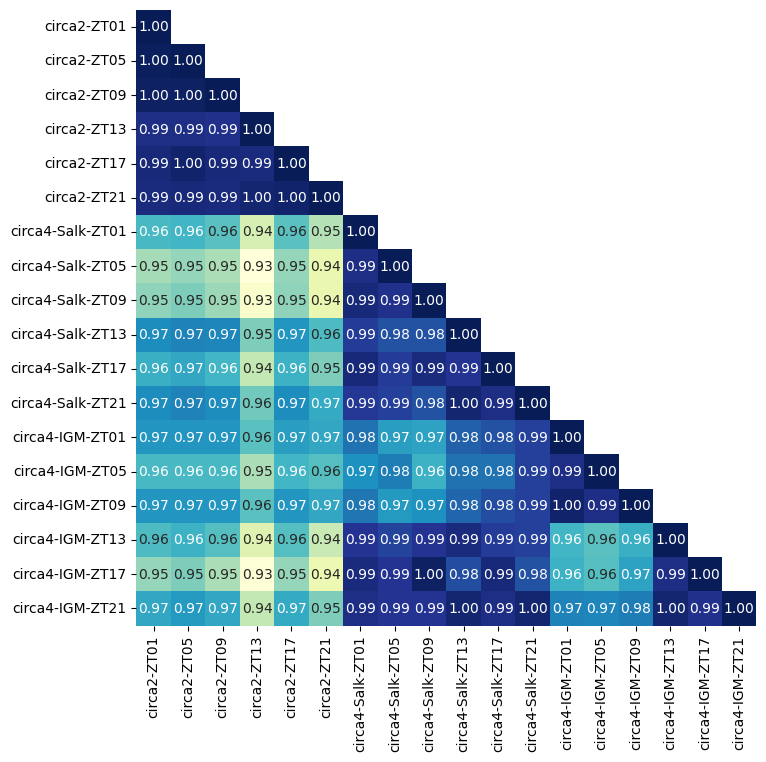

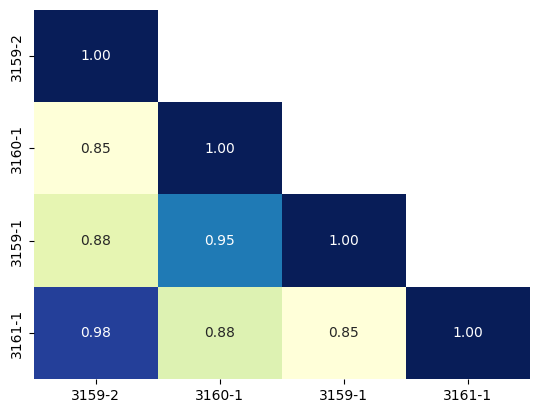

In [32]:
import seaborn as sns
import matplotlib.pyplot as plt


matrix = np.triu(df)
np.fill_diagonal(matrix, False)

plt.figure(figsize=(8,8))
sns.heatmap(df, annot=True, cmap="YlGnBu", fmt=".2f", cbar = False, mask = matrix)
plt.savefig('Gallery/pearson_correlation_matrix_circa.svg')


### Scatter plot and correlation

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
dir_ = '../data'
# dir_ = 'D:\\Xenium'

In [20]:
sample_CTRL = "circa4-IGM-ZT17"
transcript_count_CTRL = pd.read_parquet(f'{dir_}/{sample_CTRL}/transcripts.parquet')
transcript_count_CTRL = transcript_count_CTRL[(~transcript_count_CTRL['feature_name'].str.contains('_')) & (transcript_count_CTRL['qv']>=20)]

In [21]:
sample_TEST = "circa4-Salk-ZT17"
transcript_count_TEST = pd.read_parquet(f'{dir_}/{sample_TEST}/transcripts.parquet')
transcript_count_TEST = transcript_count_TEST[(~transcript_count_TEST['feature_name'].str.contains('_')) & (transcript_count_TEST['qv']>=20)]

In [22]:
transcript_count_CTRL_all = transcript_count_CTRL['feature_name'].value_counts()
transcript_count_CTRL_all = transcript_count_CTRL_all.sort_index()
transcript_count_TEST_all = transcript_count_TEST['feature_name'].value_counts()
transcript_count_TEST_all = transcript_count_TEST_all.sort_index()

In [23]:
d = {'CTRL' : transcript_count_CTRL_all.values, 'TEST' : transcript_count_TEST_all.values}

In [24]:
type(transcript_count_CTRL_all)

pandas.core.series.Series

In [25]:
df = pd.DataFrame(data = d, index = transcript_count_TEST_all.index)
df['Percent'] = df['CTRL'] / df['TEST']

In [26]:
df.sort_values(by='TEST').tail(10),df.sort_values(by='TEST').head(10)

(                 CTRL     TEST   Percent
 feature_name                            
 Gnao1          886565  1060322  0.836128
 Snap25         978625  1174494  0.833231
 Kif5c         1180277  1206775  0.978042
 Aldoa         1052768  1423641  0.739490
 Ndrg2         1378871  1424785  0.967775
 Aldoc         1283794  1491139  0.860949
 Ckb           1203646  1496821  0.804135
 Map2          1795145  1873337  0.958261
 Camk2a        2430443  2629369  0.924345
 Kif5a         3212736  3178859  1.010657,
               CTRL  TEST   Percent
 feature_name                      
 Cyp2c29         32    12  2.666667
 Cxcl2           23    23  1.000000
 Pth             37    23  1.608696
 Hoxc5           35    25  1.400000
 Il9             26    26  1.000000
 Fga             56    28  2.000000
 Krt82           34    31  1.096774
 Hoxc8           35    31  1.129032
 Hoxb9           37    31  1.193548
 Lep             35    32  1.093750)

ValueError: x and y must be the same size

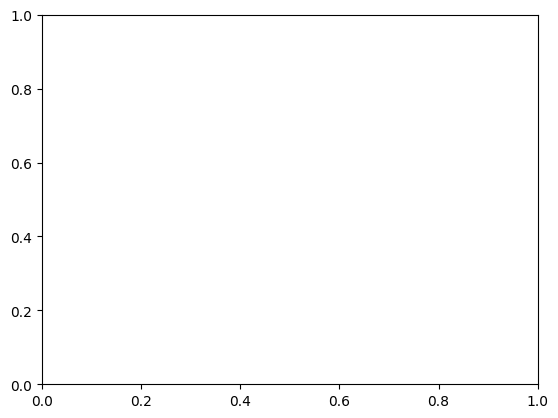

In [27]:
plt.scatter(x=range(4000), y = df['Percent'].sort_values())
plt.yscale('log')
# plt.xscale('log')
plt.hlines(y=1, xmin=0, xmax=5006)


Text(0.5, 1.0, 'Spearson correlation : 0.995')

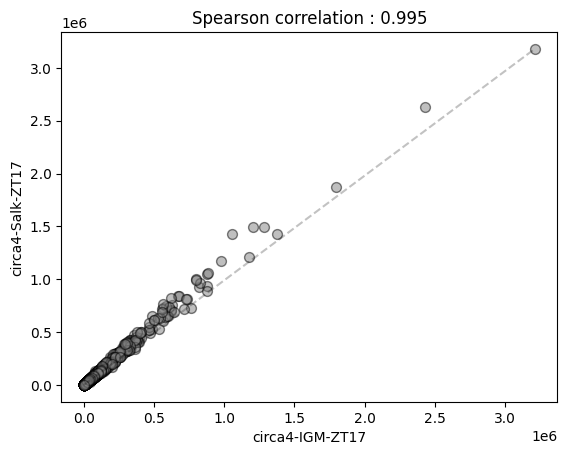

In [53]:
from scipy import stats

stat_ = stats.pearsonr(x=transcript_count_CTRL_all, y = transcript_count_TEST_all)

import matplotlib.pyplot as plt

max_x = max(transcript_count_CTRL_all)
max_y = max(transcript_count_TEST_all)

plt.scatter(x=transcript_count_CTRL_all, y = transcript_count_TEST_all, s=50, alpha = 0.50, color = 'grey', edgecolors='black')
plt.xlabel(sample_CTRL)
plt.ylabel(sample_TEST)
plt.plot([0, max_x], [0, max_y], linestyle = 'dashed', color = 'black', alpha = 0.24)
plt.title(f'Spearson correlation : {round(stat_[0],3)}')
# plt.savefig(f'/media/volume/volume_spatial/hugo/notebook/plot/correlation_scatter/{sample_CTRL}_v_{sample_TEST}_scatter_correlation.svg')

### Non-gene codewords

In [ ]:
import pandas as pd
samples = ['circa2-ZT01', 'circa2-ZT09','circa4-Salk-ZT01','circa4-IGM-ZT01', 'circa4-Salk-ZT05','circa4-IGM-ZT05', 'circa4-Salk-ZT09','circa4-IGM-ZT09',
           'circa4-Salk-ZT13','circa4-IGM-ZT13', 'circa4-Salk-ZT17','circa4-IGM-ZT17', 'circa4-Salk-ZT21','circa4-IGM-ZT21']

dir_ = '/media/volume/volume_spatial/hugo/data'
trans_stat = pd.DataFrame()
print('Sample name : total transcripts, gene transcripts, non-gene transcripts, percent of n-gene transcripts')
for sample in samples:
    transcript_count_TEST = pd.read_parquet(f'{dir_}/{sample}/transcripts.parquet')
    transcript_count_TEST_gene = transcript_count_TEST[(~transcript_count_TEST['feature_name'].str.contains('_'))]
    
    all_trans = len(transcript_count_TEST)
    all_genes = len(transcript_count_TEST_gene)
    all_ngenes = all_trans - all_genes
    percent_ngenes = float(all_ngenes / all_trans *100)
    print(sample, ':', all_trans,all_genes,all_ngenes,percent_ngenes)
    # temp_ = pd.DataFrame(all_trans,all_genes, all_ngenes,percent_ngenes)
    # trans_stat.append(temp_)



### Transcript correlation (arteries)

In [ ]:
import pandas as pd
from scipy import stats
import matplotlib.pyplot as plt

dir_ = 'H:\\arteries'

sample_CTRL = "GCA_1_LJI"
transcript_count_CTRL = pd.read_parquet(f'{dir_}/{sample_CTRL}/transcripts.parquet')
transcript_count_CTRL = transcript_count_CTRL[(~transcript_count_CTRL['feature_name'].str.contains('_')) 
                                              & (transcript_count_CTRL['qv']>=20) 
                                              & (transcript_count_CTRL['cell_id'] != "UNASSIGNED")
                                              ]

sample_TEST = "GCA_2_LJI"
transcript_count_TEST = pd.read_parquet(f'{dir_}/{sample_TEST}/transcripts.parquet')
transcript_count_TEST = transcript_count_TEST[(~transcript_count_TEST['feature_name'].str.contains('_')) & (transcript_count_TEST['qv']>=20) & (transcript_count_CTRL['cell_id']!= "UNASSIGNED")]



C:\Users\hcall\AppData\Local\Temp\ipykernel_11452\2474299680.py:11: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  transcript_count_TEST = transcript_count_TEST[(~transcript_count_TEST['feature_name'].str.contains('_')) & (transcript_count_TEST['qv']>=20) & (transcript_count_CTRL['cell_id']!= "UNASSIGNED")]


In [12]:
transcript_count_CTRL

,transcript_id,cell_id,overlaps_nucleus,feature_name,x_location,y_location,z_location,qv,fov_name,nucleus_distance,codeword_index,codeword_category,is_gene
21,281659660304581,nciokhad-1,1,ZNF683,199.921875,5637.250000,13.984375,40.00,S4,0.0,16219,predesigned_gene,True
25,281659660304799,nciokhad-1,1,ZNF683,200.468750,5636.859375,14.000000,40.00,S4,0.0,16219,predesigned_gene,True
42,281711199924280,ndleaepk-1,1,ZNF683,81.640625,5899.000000,12.750000,40.00,T4,0.0,16219,predesigned_gene,True
44,281711199913747,celffmdf-1,1,ABCA1,150.406250,6209.890625,14.984375,40.00,T4,0.0,9629,predesigned_gene,True
45,281711199914565,celffmdf-1,1,ABCA1,149.390625,6210.156250,14.687500,40.00,T4,0.0,9629,predesigned_gene,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14377485,281706904948452,ohmjemki-1,1,TNC,7028.234375,6312.937500,19.656250,40.00,T15,0.0,11775,predesigned_gene,True
14377493,281758444637865,ohodbgjn-1,1,NAA16,7094.421875,6588.406250,18.921875,40.00,U15,0.0,12425,predesigned_gene,True
14377534,281758444574685,mmkcdlom-1,1,TMEM45A,7025.109375,7076.437500,20.140625,39.75,U15,0.0,7344,predesigned_gene,True
14377556,281809984254973,ohnmbbfb-1,1,MTAP,7205.906250,7501.687500,18.500000,40.00,V15,0.0,12096,predesigned_gene,True


In [13]:
transcript_count_CTRL_all = transcript_count_CTRL['feature_name'].value_counts()
transcript_count_CTRL_all = transcript_count_CTRL_all.sort_index()
transcript_count_TEST_all = transcript_count_TEST['feature_name'].value_counts()
transcript_count_TEST_all = transcript_count_TEST_all.sort_index()

In [14]:
CTRL_genes = set(transcript_count_CTRL_all.index)
TEST_genes = set(transcript_count_TEST_all.index)
common_genes_list = list(CTRL_genes.intersection(TEST_genes))

In [15]:
temp_CTRL = []
temp_TEST = []
for gene in common_genes_list:
    temp_CTRL.append(transcript_count_CTRL_all[gene])
    temp_TEST.append(transcript_count_TEST_all[gene])

In [16]:
d = {'CTRL' : temp_CTRL, 'TEST' : temp_TEST}
df = pd.DataFrame(data = d, index = common_genes_list)
df.sort_values(by='CTRL').tail(10),df.sort_values(by='CTRL').head(10)

(          CTRL   TEST   Percent
 TUBB     28443   4147  7.290019
 ITGB2    28629   3467  6.055049
 ANXA2    31648   5036  7.956269
 PKM      33099   3966  5.991118
 COL4A1   33235   1827  2.748608
 CD44     33455   3044  4.549395
 MYH9     34097   4028  5.906678
 TNC      35834   3391  4.731540
 POSTN    41133   6169  7.498845
 EEF1G   104494  10050  4.808889,
           CTRL  TEST    Percent
 CST5         2     1  25.000000
 NLRP5        3     1  16.666667
 KLK4         3     3  50.000000
 CHAD         3     1  16.666667
 SERPINC1     3     1  16.666667
 HTR1A        3     1  16.666667
 ADGRD2       3     1  16.666667
 AHSG         3     1  16.666667
 CHRNB3       3     2  33.333333
 NGB          3     1  16.666667)

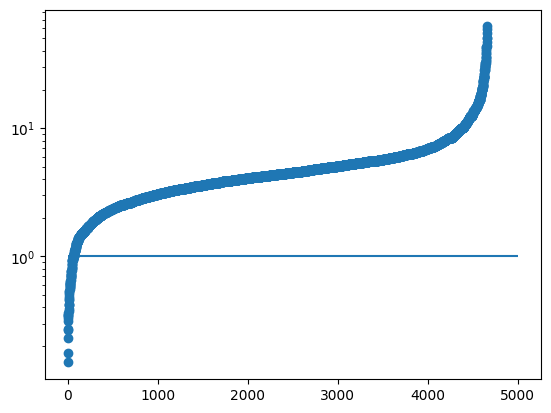

In [17]:
plt.scatter(x=range(len(df)), y = df['Percent'].sort_values())
plt.yscale('log')
# plt.xscale('log')
plt.hlines(y=1, xmin=0, xmax=5006)

Text(0.5, 1.0, 'Spearson correlation : 0.88')

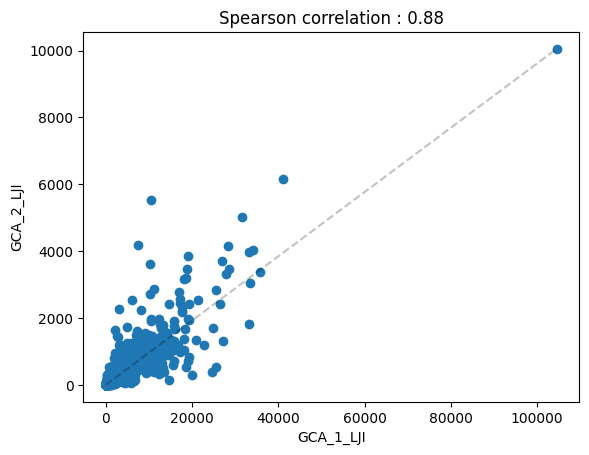

In [18]:
from scipy import stats
stat_ = stats.pearsonr(x=df['CTRL'], y = df['TEST'])


max_x = max(df['CTRL'])
max_y = max(df['TEST'])

plt.scatter(x=df['CTRL'], y = df['TEST'])
plt.xlabel(sample_CTRL)
plt.ylabel(sample_TEST)
plt.plot([0, max_x], [0, max_y], linestyle = 'dashed', color = 'black', alpha = 0.24)
plt.title(f'Spearson correlation : {round(stat_[0],3)}')
# plt.savefig(f'plot/correlation_scatter/{sample_CTRL}_v_{sample_TEST}_scatter_correlation.svg')